In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
review_df1 = pd.read_csv(r"C:\Users\Binguni\Desktop\Yelp_analysis\datasets\yelp_dataset.csv")
review_df2 = pd.read_csv(r"C:\Users\Binguni\Desktop\Yelp_analysis\datasets\yelp_data_unpacked.csv")

In [4]:
review_df2.head()

,Alias,Name,Rating,Price,City,Zip_code,Address,Review
0,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'The chocolate cups are amazing! Have been eat...
1,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Morris Park Bake Shop has become my go to spo...
2,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'I thought the cookies and biscotti were prett...
3,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Guys.... so Im a big time biscotti connoisseu...
4,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'I had a craving for a special type of cake wi...


In [5]:
review_df2['Review_Word_Count'] = review_df2['Review'].apply(lambda x: len(str(x).split()))

Text(0, 0.5, 'Number of Words')

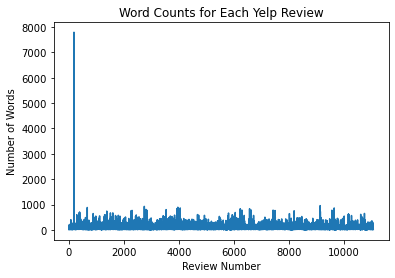

In [6]:
review_df2['Review_Word_Count'].plot()
plt.title('Word Counts for Each Yelp Review')
plt.xlabel('Review Number')
plt.ylabel('Number of Words')

In [8]:
review_df2[review_df2['Review_Word_Count'] > 1000]

,Alias,Name,Rating,Price,City,Zip_code,Address,Review,Review_Word_Count
184,riviera-caterers-brooklyn,Riviera Caterers,4.5,NaN,Brooklyn,11224,2780 Stillwell Ave,'Got a question about Riviera Caterers? Ask th...,7791


In [9]:
long_review = review_df2[review_df2['Review_Word_Count'] > 1000]['Review'][184]
long_review

'\'Got a question about Riviera Caterers? Ask the Yelp community!, I had my wedding here a month ago and I would give Riviera10 stars if I could. It was such a joy and ease to work with Adam, Tommy, and their staff. A true diamond in the rough of Coney Island and the best value out there for Brooklyn weddings! Extremely recommend this place.First, the space has been recently remodeled and it is truly gorgeous and modern. You dont have to worry about bringing in much of your own decorations - our florals, ceremony, table settings, and photos looked stunning against the Rivieras backdrop.The service of the Riviera staff was also impeccable. Up to the wedding, they were responsive and helpful and kind. During our wedding, the staff took extreme care of us and our guests, and over-checked on us every step of the way. I felt very taken care of. At the end of the night, waiters had trays of water waiting for everyone as they headed home from the party. They even put champagne in the bathroom

In [10]:
new_review = str(long_review).replace('Got a question about Riviera Caterers? Ask the Yelp community!,','')   

In [11]:
review_df2 = review_df2.replace(long_review,new_review)

In [12]:
review_df2[review_df2['Review_Word_Count'] > 1000]['Review'][184][0:100]

"' I had my wedding here a month ago and I would give Riviera10 stars if I could. It was such a joy a"

In [13]:
review_df2['Review_Char_Count'] = review_df2['Review'].apply(lambda x: len(str(x)))

## Removing Stop words

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


example_sent = """Eventhough the price is very high in Highland products, but they are not harmful to our health."""

stop_words = set(stopwords.words('english'))
stop_words.remove('not')
stop_words.remove('very')
 
word_tokens = word_tokenize(example_sent)
 
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

['Eventhough', 'the', 'price', 'is', 'very', 'high', 'in', 'Highland', 'products', ',', 'but', 'they', 'are', 'not', 'harmful', 'to', 'our', 'health', '.']
['Eventhough', 'price', 'very', 'high', 'Highland', 'products', ',', 'not', 'harmful', 'health', '.']


In [24]:
review_df2['Lowercase'] = review_df2['Review'].apply(lambda x: ' '.join(word.lower() for word in str(x).split()))

In [25]:
review_df2['Cleaned'] = review_df2['Lowercase'].str.replace('[^\w\s]', '')

In [31]:
Reviews_noStopWords = []

for i in range(len(review_df2)):
    
    review = str(review_df2['Cleaned'][i])
    review = review.lower()
    
    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    stop_words.remove('very')
    word_tokens = word_tokenize(review)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    
    Reviews_noStopWords.append(filtered_sentence)

In [32]:
review_df2['No_Stop_Words:Tokens'] = Reviews_noStopWords

In [33]:
review_df2['No_Stop_Words:Sentence'] = Reviews_noStopWords
for i in range(len(review_df2)): 
    text_list = review_df2['No_Stop_Words:Tokens'][i]
    blank = ''
    for word in text_list:
        blank = blank+' '+word
    review_df2['No_Stop_Words:Sentence'][i] = blank

In [34]:
Stop_Word_Count = []
for i in range(len(review_df2)):
    review = str(review_df2['Review'][i]).lower()
    count = 0
    for word in review.split():
        if word in stop_words:
            count += 1
    Stop_Word_Count.append(count)

review_df2['Stop_Word_Count'] = Stop_Word_Count

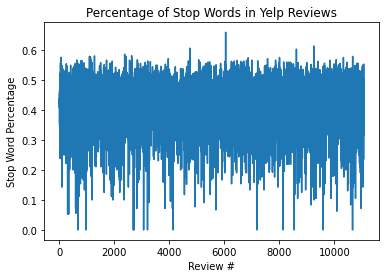

In [35]:
full = review_df2['Review_Word_Count']
partial = review_df2['Stop_Word_Count']

review_df2['Stop_Words_%'] = partial/full
review_df2['Stop_Words_%'].plot()
plt.title('Percentage of Stop Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Stop Word Percentage');

In [36]:
review_df2[review_df2['Stop_Words_%'] > 0.65]['Review'][6043]

"'I have been coming to this restaurant for years. I am so happy to see that it is still here after all we have been through with Covid. If you have not been here you should be. It has great good. The soup is sooo very good."

In [37]:
review_df2[review_df2['Stop_Words_%'] < 0.05]['Review'][4136]

"'Awesome cheap food! Good Ambience decently priced drinks"

## Some Filterations

In [38]:
pd.Series(''.join(review_df2['No_Stop_Words:Sentence']).split()).value_counts()[:20]

not           6884
food          6735
place         6203
good          5777
great         4404
very          4321
like          3984
service       3603
one           3520
time          3122
get           3069
back          2967
go            2729
would         2720
really        2666
bar           2591
also          2538
restaurant    2448
ordered       2308
us            2268
dtype: int64

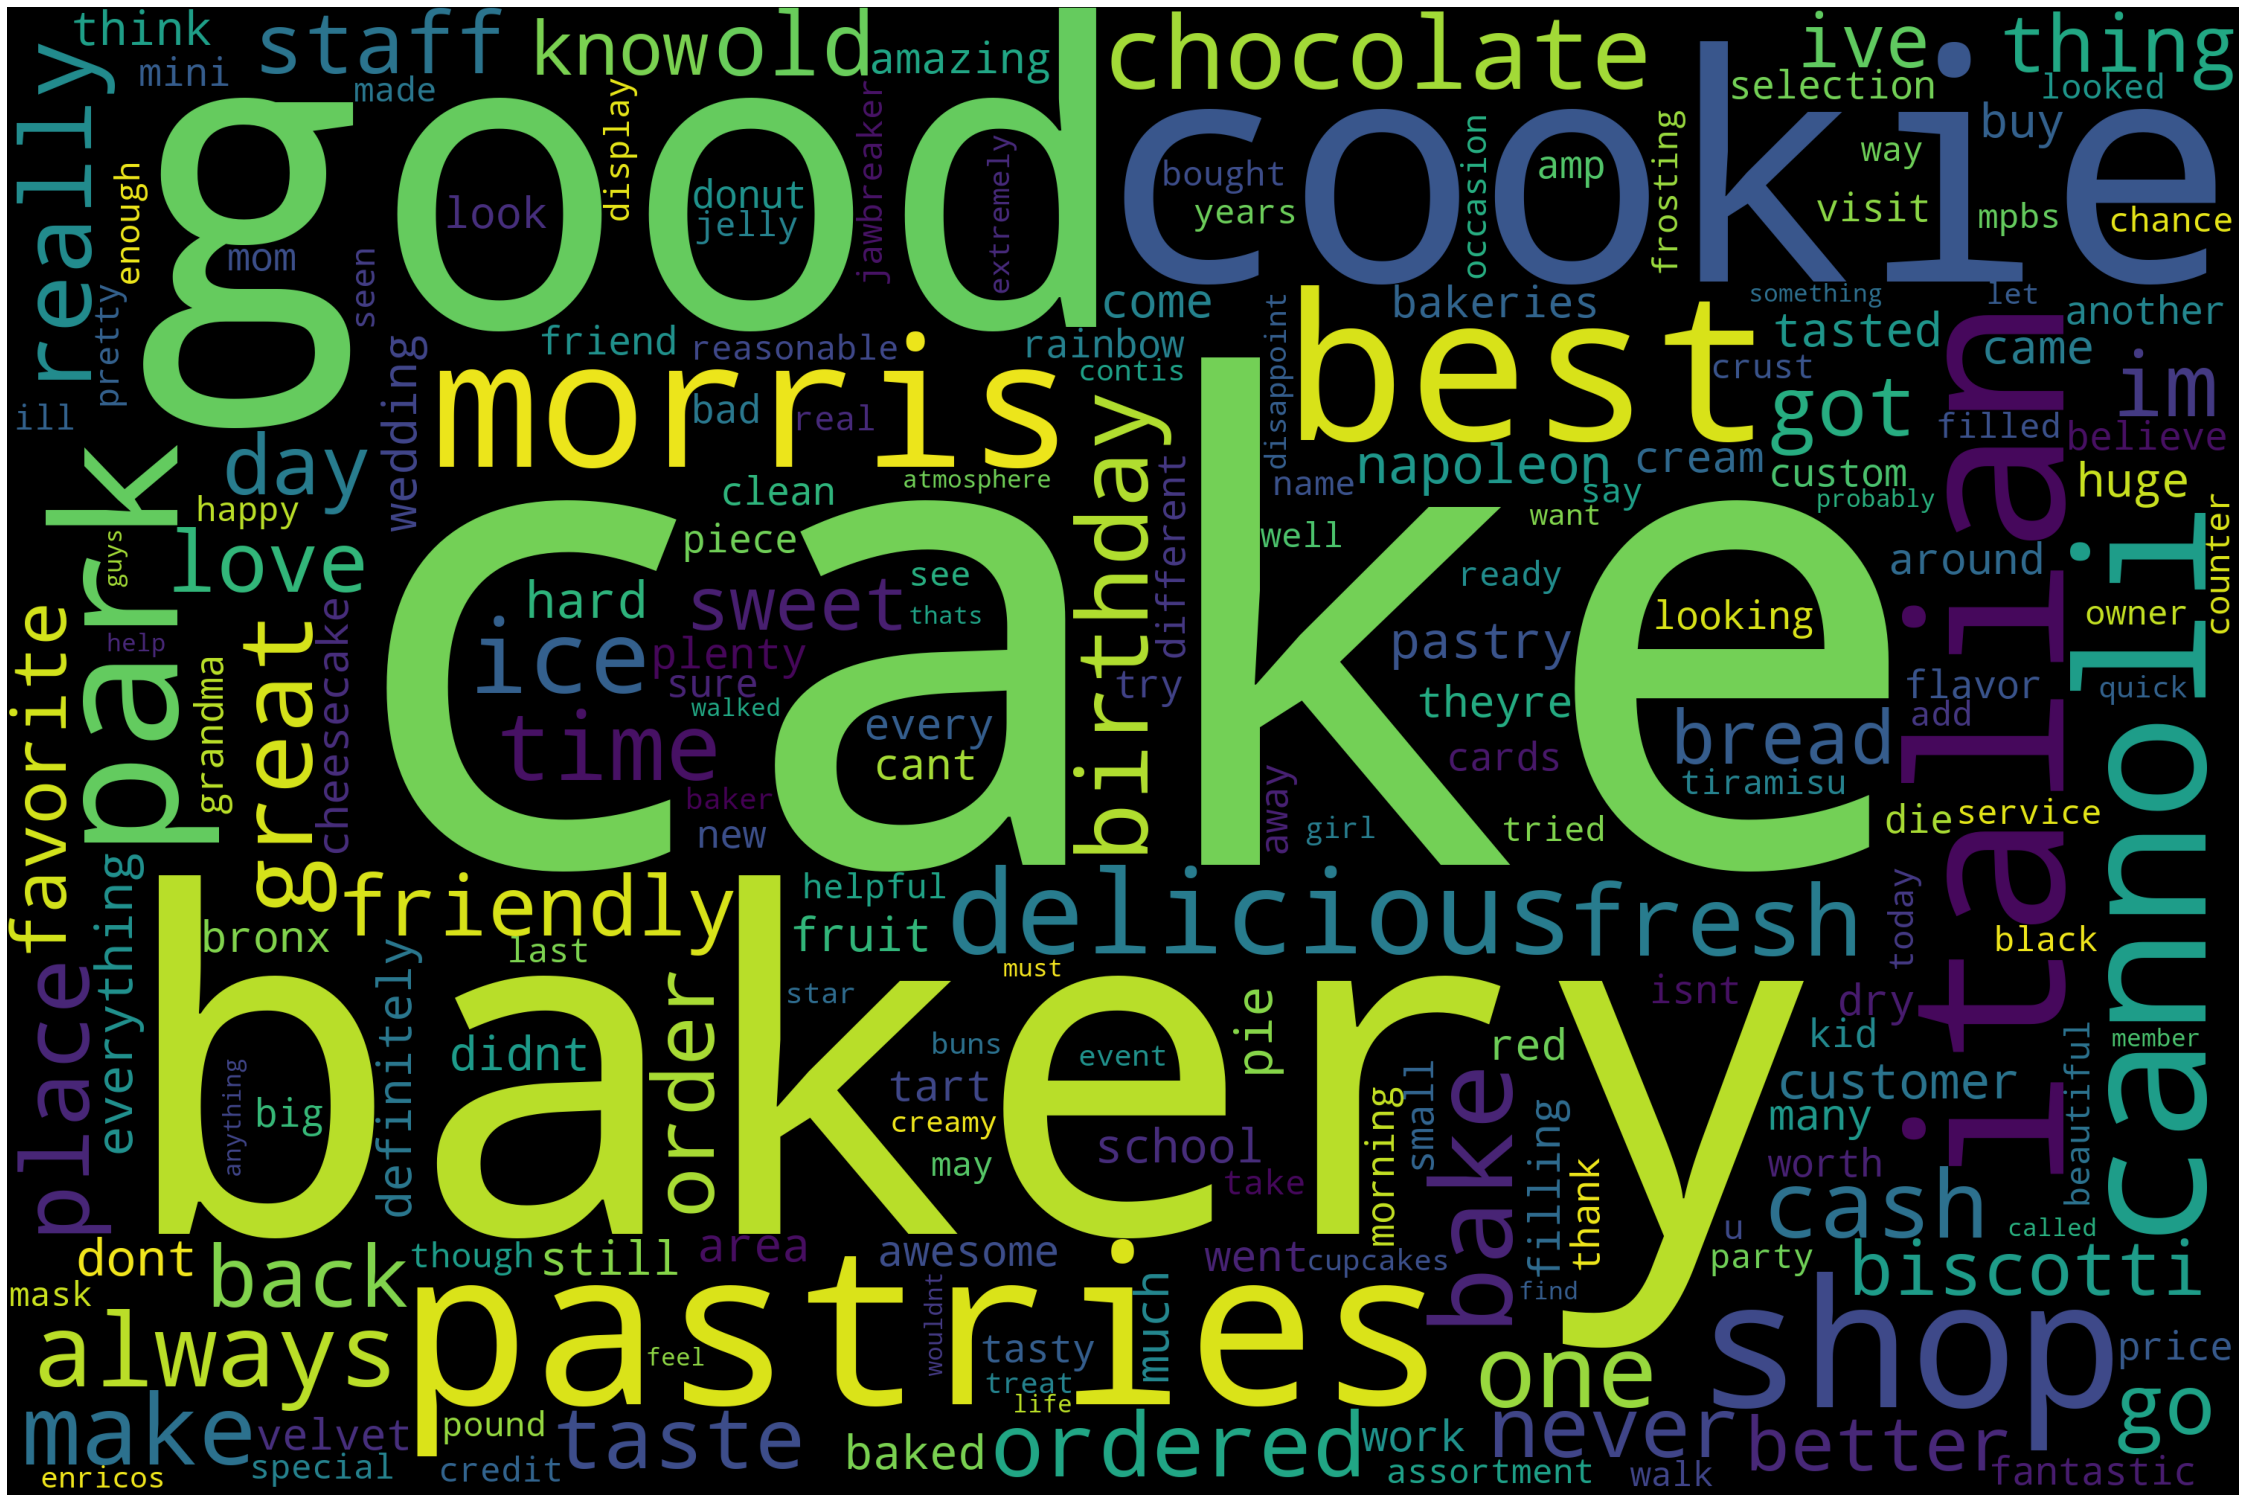

In [39]:
def get_all_text(location):
    all_words = ''
    for i in range(len(review_df2['Name'])):
        if review_df2['Name'][i] == location:
            words = review_df2['No_Stop_Words:Tokens'][i]
            blank = ''
            for word in words:
                blank = blank+' '+word
            all_words = all_words + ' '+blank
            
    return all_words


text = get_all_text("Morris Park Bake Shop")

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(text)
plot_cloud(wordcloud)

## Stemming and Lemmatization

In [41]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [42]:
import textblob
from textblob import Word

In [43]:
review_df2['Lemmatized'] = review_df2['No_Stop_Words:Sentence'].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))

In [44]:
import nltk
from nltk.stem.snowball import SnowballStemmer

snowBallStemmer = SnowballStemmer("english")

sentence = review_df2['Lemmatized'][40]
wordList = nltk.word_tokenize(sentence)

stemWords = [snowBallStemmer.stem(word) for word in wordList]

stemmed = ' '.join(stemWords)
print(sentence)
print('')
print(stemmed)

awesome bake shop huge variety pastry mini cake ordered napoleon chocolate mouse black white cookie black white cookie bit dry however napoleon chocolate mouse amazing napoleon different one normally bakery usually theyre filled sum kinda bavaraian eclair type cream one filled taste like vanilla pudding great mini cake 150 piece 3 piece put scale price extremely reasonable well

awesom bake shop huge varieti pastri mini cake order napoleon chocol mous black white cooki black white cooki bit dri howev napoleon chocol mous amaz napoleon differ one normal bakeri usual theyr fill sum kinda bavaraian eclair type cream one fill tast like vanilla pud great mini cake 150 piec 3 piec put scale price extrem reason well


In [45]:
import re
def word_extraction(sentence):   
    words = re.sub("[^\w]", " ",  sentence).split()    
    cleaned_text = [w.lower() for w in words]    
    return cleaned_text

In [46]:
stemmed_list = []
stemmed_tokens_list = []
for i in range(len(review_df2)):
    sentence = review_df2['Lemmatized'][i]
    wordList = nltk.word_tokenize(sentence)
    stemWords = [snowBallStemmer.stem(word) for word in wordList]
    
    stemmed = ' '.join(stemWords)
    stemmed_list.append(stemmed)

In [47]:
review_df2['Stemmed:Sentence'] = stemmed_list

In [48]:
for i in range(len(review_df2)):
    stemmed = review_df2['Stemmed:Sentence'][i]
    tokens = word_extraction(stemmed)
    stemmed_tokens_list.append(tokens)

In [49]:
review_df2['Stemmed:Tokens'] = stemmed_tokens_list

In [50]:
review_df2['Stemmed:Tokens'][1]

['morri',
 'park',
 'bake',
 'shop',
 'becom',
 'go',
 'spot',
 'atmospher',
 'place',
 'great',
 'invit',
 'love',
 'everi',
 'thing',
 'order',
 'staff',
 'realli',
 'pleasant',
 'definit',
 'help',
 'anyth',
 'definit',
 'come',
 'back',
 'morri',
 'park',
 'bake',
 'shop']

In [51]:
review_df2['Stemmed_Word_Count'] = review_df2['Stemmed:Sentence'].apply(lambda x: len(str(x).split()))


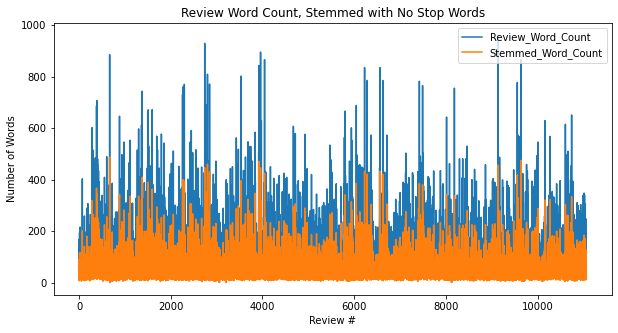

In [52]:
plt.figure(figsize=(10,5))
review_df2[review_df2['Review_Word_Count']< 2000]['Review_Word_Count'].plot()
review_df2[review_df2['Stemmed_Word_Count']< 1000]['Stemmed_Word_Count'].plot()
plt.title('Review Word Count, Stemmed with No Stop Words')
plt.xlabel('Review #')
plt.ylabel('Number of Words')
plt.legend()

## Positive Lexicon

In [54]:
file = open("positive_lexicon.txt", "r")
content = file.read()
pos_lexicon = content.splitlines()
pos_lexicon_stem = [snowBallStemmer.stem(word) for word in pos_lex]

In [55]:
positive_count = []
for i in range(len(review_df2)):
    count = 0
    tokens = review_df2['Stemmed:Tokens'][i]
    for word in tokens:
        if word in pos_lex_stem:
            count += 1
    positive_count.append(count)

In [58]:
review_df2['Positive_Word_Count'] = positive_count

In [59]:
review_df2['Positive_Words_%'] = review_df2['Positive_Word_Count']/(review_df2['Review_Word_Count']-review_df2['Stop_Word_Count'])

Text(0, 0.5, 'Percentage')

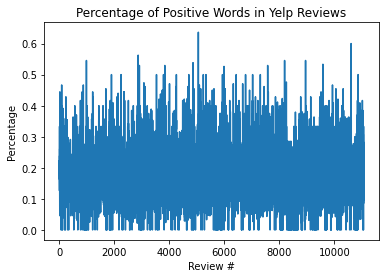

In [60]:
review_df2['Positive_Words_%'].plot()
plt.title('Percentage of Positive Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Percentage')

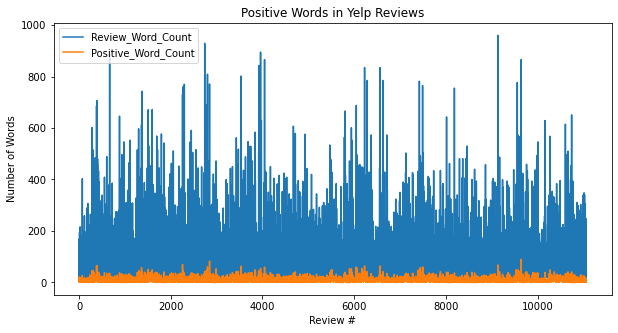

In [61]:
plt.figure(figsize=(10,5))
review_df2[review_df2['Review_Word_Count']< 2000]['Review_Word_Count'].plot()
review_df2[review_df2['Positive_Word_Count']< 600]['Positive_Word_Count'].plot()
plt.title('Positive Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Number of Words')
plt.legend()

## Word Count Matrix

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

def get_all_stemmed_tokens(location):
    all_tokens = []
    for i in range(len(review_df2['Stemmed:Tokens'])):
        if review_df2['Name'][i] == location:
            tokens = review_df2['Stemmed:Tokens'][i]
            all_tokens.append(str(tokens))
            
    return all_tokens

docs = get_all_stemmed_tokens('Morris Park Bake Shop')
vec = CountVectorizer()
X = vec.fit_transform(docs)
word_matrix = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [63]:
word_matrix.head()

,11lb,125,13,130,15,150,1st,2018,22,25,...,wrong,year,yesterday,yet,york,your,youv,yum,yummi,yummyfresh
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
word_matrix = word_matrix.append(word_matrix.sum(numeric_only=True), ignore_index=True)

In [70]:
word_matrix = word_matrix.sort_values(by = (len(word_matrix)-1), axis=1, ascending=False)

In [71]:
word_matrix20 = word_matrix.iloc[:, : 20]

In [72]:
morris = word_matrix20.iloc[54]

In [73]:
morris

cake       65
bakeri     32
pastri     30
not        29
good       25
cooki      24
bake       22
italian    22
best       20
order      20
shop       18
cannoli    18
morri      18
delici     17
park       17
tast       16
like       16
ice        14
make       13
great      13
Name: 54, dtype: int64

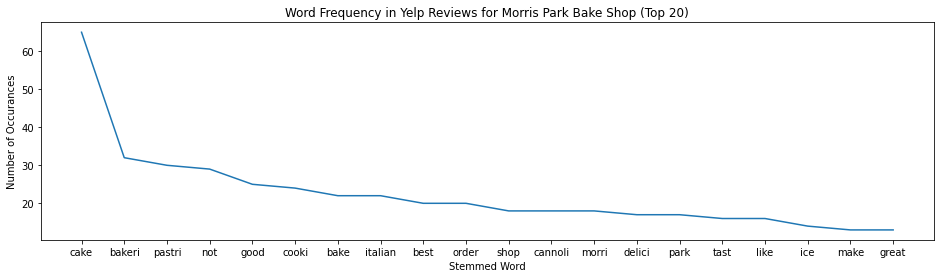

In [74]:
plt.figure(figsize=(16,4))
plt.title('Word Frequency in Yelp Reviews for Morris Park Bake Shop (Top 20)')
plt.xlabel('Stemmed Word')
plt.ylabel('Number of Occurances')
plt.plot(morris)

In [75]:
def get_word_frequency_graph(index):

    docs = get_all_stemmed_tokens(review_df2['Name'].unique()[index])
    vec = CountVectorizer()
    X = vec.fit_transform(docs)
    df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
    df = df.append(df.sum(numeric_only=True), ignore_index=True)
    df = df.sort_values(by = (len(df)-1), axis=1, ascending=False)
    df20 = df.iloc[:, : 20]
    x = df20.iloc[len(df20)-1]
    plt.figure(figsize=(16,4))
    plt.title('Word Frequency in Yelp Reviews for '+ review_df2['Name'].unique()[index] + ' (Top 20)')
    plt.xlabel('Stemmed Word')
    plt.ylabel('Number of Occurances')
    plt.plot(x)

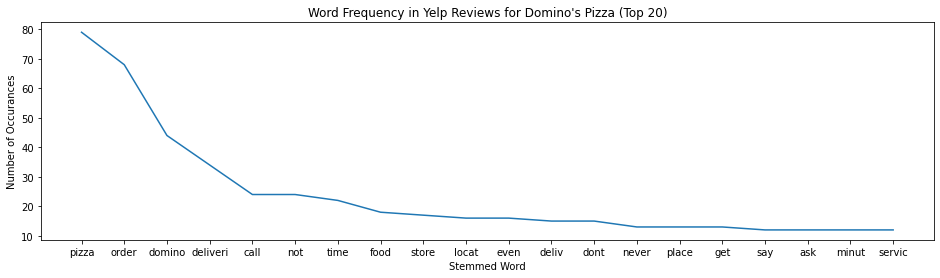

In [76]:
bad_review = list(review_df2[review_df2['Rating'] < 2.5]['Name'])[0]
bad_index = list(review_df2['Name'].unique()).index(bad_review)

get_word_frequency_graph(bad_index)

## Polarity and Subjectivity

TextBlob has a very useful library that can determine the Polarity(-1,1) and Subjectivity(0,1) from text. For this project, the polarity is really the only useful one, as it will help us classify the reviews we're working with now and help train for the model, but subjectiveness could be interesting to look into as well

In [77]:
from textblob import TextBlob

In [78]:
review_df2['Polarity'] = review_df2['Lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])
review_df2['Subjectivity'] = review_df2['Lemmatized'].apply(lambda x: TextBlob(x).sentiment[1])

So does this word, let's test with the example of a restaurant with bad reviews like the Domino's we used for an example above. With all these negative reviews it should have a polarity well below 0

In [79]:
polarity = review_df2[review_df2['Name'] == bad_review]['Polarity'].mean()
polarity

0.0018899535591081892

## Polarity and Positive Word Percentage

Let's see if there is a relationship between the percentage of positive words in a review and its polarity. I'll be doing this by soring the data into three sets:

*Polarity < 0: Meaning these reviews should be negative and, therofore have a lower positive words percentage
*Polarity > 0: Where the percentage of positive words SHOULD go up
*Polarity = 0: Where the sentiment should be neutral, so the percentage should be in between the other

In [80]:
df1 = review_df2[review_df2['Polarity'] < 0]
df2 = review_df2[review_df2['Polarity'] > 0]
df3 = review_df2[review_df2['Polarity'] == 0]

df1 = df1.sort_values(by='Polarity')
df2 = df2.sort_values(by='Polarity')
df3 = df3.sort_values(by='Polarity')

df1 = df1.reset_index()
df2 = df2.reset_index()
df3 = df3.reset_index()

df3.index=np.arange(len(df1),(len(df1)+len(df3)))
df2.index=np.arange((len(df3)+len(df1)),(len(df1)+len(df3)+len(df2)))

In [81]:
df4 = review_df2
df4 = df4.sort_values(by='Polarity')

Text(0, 0.5, 'Positive Word Percentage')

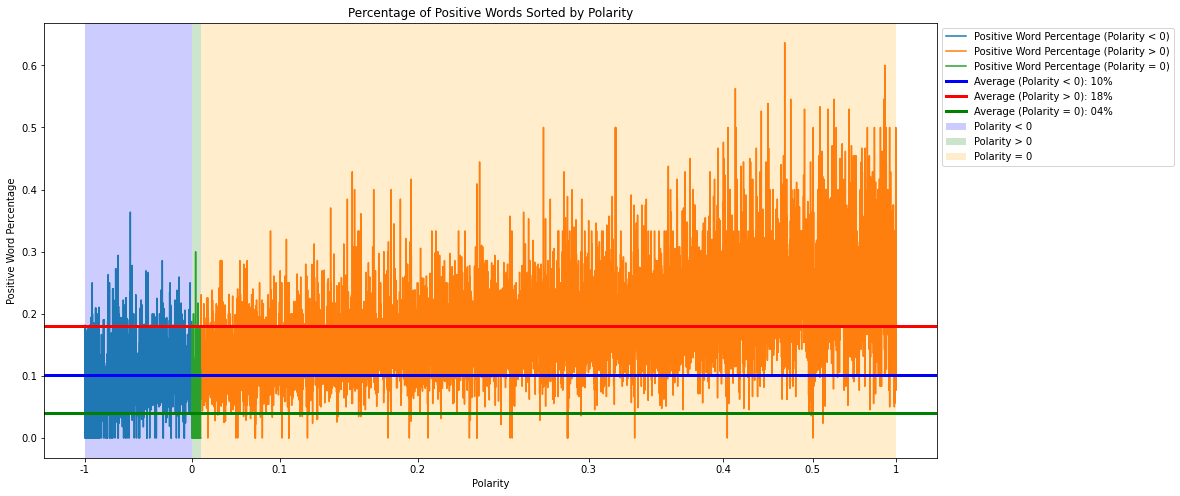

In [82]:
import matplotlib.transforms as transforms


# set up figure
fig, ax = plt.subplots(figsize=(16,8))

x = review_df2.index

# set x axis for partial plots
x1 = df1.index
y1 = df1['Positive_Words_%']
x2 = df2.index
y2 = df2['Positive_Words_%']
x3 = df3.index
y3 = df3['Positive_Words_%']

# calculate average for each partial
av1 = df1['Positive_Words_%'].mean()
av2 = df2['Positive_Words_%'].mean()
av3 = df3['Positive_Words_%'].mean()

# plot word percentage
plt.plot(x1,y1,label='Positive Word Percentage (Polarity < 0)')
plt.plot(x2,y2,label='Positive Word Percentage (Polarity > 0)')
plt.plot(x3,y3,label='Positive Word Percentage (Polarity = 0)')

# plot area to define polarity zones
plt.axvspan(0,len(df1), facecolor='blue', alpha=0.2,label='Polarity < 0')
plt.axvspan(len(df1),(len(df1)+len(df3)), facecolor='green',alpha=0.2,label='Polarity > 0')
plt.axvspan((len(df1)+len(df3)),(len(df1)+len(df3)+len(df2)), facecolor='orange',alpha=0.2, label='Polarity = 0')

# plot average lines
plt.axhline(y=av1,linewidth=3, color='b',label='Average (Polarity < 0): '+str(av1)[2:4]+'%')
plt.axhline(y=av2,linewidth=3, color='r',label='Average (Polarity > 0): '+str(av2)[2:4]+'%')
plt.axhline(y=av3,linewidth=3, color='g',label='Average (Polarity = 0): '+str(av3)[2:4]+'%')

# label x axis as polarity
labels = ['-1','0','0.1','0.2','0.3','0.4','0.5','1']
ticks = [0,len(df1),2655,4539,6869,8704,9924,11065]

ax.set_xticks(ticks)
ax.set_xticklabels(labels)

ax.legend(bbox_to_anchor=(1, 1))
plt.title('Percentage of Positive Words Sorted by Polarity')
plt.xlabel('Polarity')
plt.ylabel('Positive Word Percentage')

In [83]:
review_df2.columns

Index(['Alias', 'Name', 'Rating', 'Price', 'City', 'Zip_code', 'Address',
       'Review', 'Review_Word_Count', 'Review_Char_Count', 'Lowercase',
       'Cleaned', 'No_Stop_Words:Tokens', 'No_Stop_Words:Sentence',
       'Stop_Word_Count', 'Stop_Words_%', 'Lemmatized', 'Stemmed:Sentence',
       'Stemmed:Tokens', 'Stemmed_Word_Count', 'Positive_Word_Count',
       'Positive_Words_%', 'Polarity', 'Subjectivity'],
      dtype='object')

In [84]:
analyzed_data = review_df2[['Alias', 'Name', 'Rating', 'Price', 'City', 'Zip_code', 'Address',
       'Review', 'Review_Word_Count', 'No_Stop_Words:Tokens', 'No_Stop_Words:Sentence',
       'Stop_Word_Count', 'Stop_Words_%', 'Lemmatized', 'Stemmed:Sentence',
       'Stemmed:Tokens', 'Polarity','Positive_Word_Count', 'Positive_Words_%','Stemmed_Word_Count']]

In [85]:
analyzed_data.to_csv(r'analyzed_data.csv',index=False)